# TP1-SD204

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1

In [16]:
year = [i for i in range(1968,1983)] 
gnp = [873.4, 944, 992.7, 1077.6,1185.9, 1326.4, 1434.2, 1549.2,1718, 1918.3, 2163.9, 2417.8, 2633.1, 2937.7, 3057.5]
invest = [133.3, 149.3, 144.2,166.4 , 195 ,229.8 ,  228.7 , 206.1, 257.9,324.1, 386.6, 423 , 402.3 ,  471.5 , 421.9] 
cpi = [82.54 , 86.79 ,91.45, 96.01, 100, 105.75, 115.08, 125.79, 132.34, 140.05,  150.42, 163.42, 178.64, 195.51, 207.23]
interest = [5.16, 5.87, 5.95, 4.88, 4.5, 6.44, 7.83, 6.25, 5.5, 5.46, 7.46, 10.28, 11.77, 13.42, 11.02]
dict = {'Year': year, 'GNP': gnp, 'Invest': invest, 'Cpi': cpi, 'Interest': interest} 
df = pd.DataFrame(dict) 
df

,Year,GNP,Invest,Cpi,Interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


### Q2

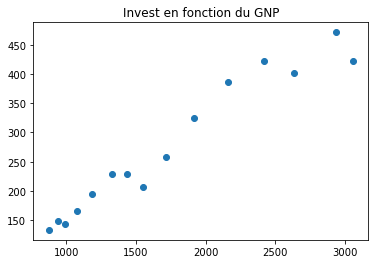

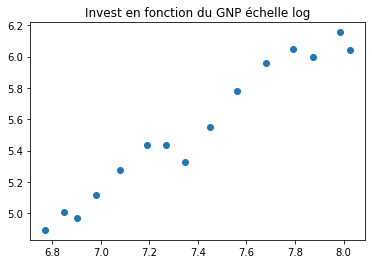

In [17]:
x = df['GNP']
y = df['Invest']
plt.scatter(x,y)
plt.title("Invest en fonction du GNP")
plt.show()

xlog = np.log(df['GNP'])
ylog = np.log(df['Invest'])
plt.title("Invest en fonction du GNP échelle log")
plt.scatter(xlog,ylog)
plt.show()

In [18]:
# Estimation of the slope and the intercept

X = np.array(np.log(df['GNP']))
Y = np.array(np.log(df['Invest']))
Xmean = np.mean(X)
Ymean = np.mean(Y)

Xc = X - Xmean
Yc = Y - Ymean 
Snum = np.sum(Xc*Yc)
Sden = np.sum(Xc*Xc)

b1 = Snum/Sden
b0 = Ymean - b1 * Xmean

# Calcul du coefficient de corrélation

Yp = b0 + b1 * X
Rcarre = np.sum((Yp - Ymean)**2) / np.sum((Y - Ymean)**2)

print("b0=", b0, "b1=", b1)

b0= -1.9635913352301815 b1= 1.015281401598871


### Q4

In [21]:
# H0 : b0 = 0
n = np.size(Y)

sigma_carré = 1/(n-2) * np.sum((Y - (b0 + b1*X))**2)

S = np.sum(Xc*Xc)
var1 = sigma_carré / S

Tn = b1/np.sqrt(var1)

p = 1

from scipy.stats import t  

alpha = 2 * (1-t.cdf(Tn, (n-(p+1))))
print(alpha)
print("Le test est donc rejeté")



1.1363709973011282e-10
Le test est donc rejeté


### Q5

In [34]:
# Prediction
xlog = np.log(1000)
ylog = b0 + b1*xlog

import scipy.stats
# Confidence interval
S = np.sum(Xc*Xc)
S1 = np.sqrt(sigma_carré * (1/n + (xlog**2)/S))
t1 = t.ppf([0.05, 0.95], (n-(p+1)))
CIinf = ylog - t1[0]*S1
CIsup = ylog + t1[1]*S1
print(CIinf)

print("CI(1000) = [" + str(CIinf) + " ; " + str(CIsup) + "]")

# Prediction Interval
S = np.sum(Xc*Xc)
S1 = np.sqrt(sigma_carré * (1+1/n + (xlog**2)/S))
PIinf = ylog - t1[0]*S1
PIsup = ylog + t1[1]*S1

print("PI(1000) = [" + str(PIinf) + " ; " + str(PIsup) + "]")


5.728418197423583
CI(1000) = [5.728418197423583 ; 5.728418197423583]
PI(1000) = [5.745928273265732 ; 5.745928273265732]


### Q6

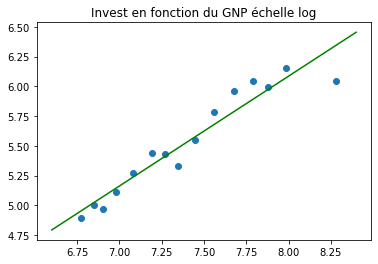

In [106]:
# Data
xlog = np.log(df['GNP'])
ylog = np.log(df['Invest'])
plt.title("Invest en fonction du GNP échelle log")
plt.scatter(xlog,ylog)

# Regression
x0 = 1/10 * np.arange(66, 85)
y0 = b0 + b1*x0
plt.plot(x0,y0, color="green")

# CI


plt.show()

### Q7

In [100]:
from sklearn.linear_model import LinearRegression

X = np.array(np.log(df['GNP'])).reshape((-1, 1))
Y = np.array(np.log(df['Invest']))

reg = LinearRegression().fit(X, Y)

print("b0 via sklearn = " + str(reg.intercept_))
print("b0 à la main = " + str(b0))

# Calcul of the scope

Xpred = np.array([7, 8]).reshape(-1,1)
Ypred = reg.predict(Xpred)
scope = Ypred[1]-Ypred[0]

print("b1 via sklearn = " + str(scope))
print("b1 à la main = " + str(b1))


b0 via sklearn = -1.2981137156516835
b0 à la main = -1.2981137156516827
b1 via sklearn = 0.923001022410924
b1 à la main = 0.9230010224109235


### Q8

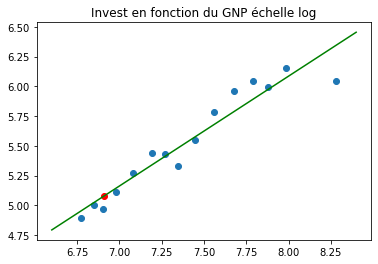

In [105]:
xlog = np.log(df['GNP'])
ylog = np.log(df['Invest'])
plt.title("Invest en fonction du GNP échelle log")
plt.scatter(xlog,ylog)


gnp = np.array([[np.log(1000)]])
invest = reg.predict(gnp)

plt.scatter(gnp,invest, color = "red")


x0 = 1/10 * np.arange(66, 85)
y0 = b0 + b1*x0
plt.plot(x0,y0, color="green")
plt.show()


### Q9